<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Ресемплировние-и-подготовка-признаков" data-toc-modified-id="Ресемплировние-и-подготовка-признаков-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Ресемплировние и подготовка признаков</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Дополнительная-обработка" data-toc-modified-id="Дополнительная-обработка-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Дополнительная обработка</a></span></li><li><span><a href="#Дополнительное-тестирование" data-toc-modified-id="Дополнительное-тестирование-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Дополнительное тестирование</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

# Описание данных
- Количество заказов находится в столбце 'num_orders'

# План выполнения исследования
- [1 Подготовка](#step_1):
-- планирую импортировать библиотеки
-- открыть файл и посмотреть на данные стандартными методами
-- дополнительно посмотреть на данные способами продемонстрированными в тренажере в ходе спринта
-- подготовить признаки с подходами аналогичными тем, что показаны в тренажере (возможно что-то еще посмотрю), выполню ресемпленирование по часу
-- подготовлю выборки  

- [2 Анализ](#step_2):
-- посмотрю на данные в графиках, возможно придут какие-то модели  

- [3 Обучение](#step_3):
-- проведю обучение ряда моделей, постараюсь сделать валидацию (в спринте не было - поищу информацию)

- [4 Тестирование](#step_4):
-- проведу тестирование, выберу лучшую модель, подготовлю выводы

<a id='step_1'></a>
## Подготовка
- планирую импортировать библиотеки
- открыть файл и посмотреть на данные стандартными методами
- дополнительно посмотреть на данные способами продемонстрированными в тренажере в ходе спринта
- подготовить признаки с подходами аналогичными тем, что показаны в тренажере (возможно что-то еще посмотрю), выполню ресемпленирование по часу
- подготовлю выборки  

In [1]:
# ячейка импорта
import pandas as pd
import numpy as np

import random                    

import lightgbm as lgb           # импорт LightGBM

import matplotlib.pyplot as plt  # для построения графиков
import seaborn as sns            # для построения графиков


from sklearn.model_selection import train_test_split  # для разбиения на выборки

# модели классификация

from sklearn.tree import DecisionTreeClassifier      # модель решающего дерева
from sklearn.ensemble import RandomForestClassifier  # модель случайного леса
from sklearn.neighbors import KNeighborsClassifier    # модель k-ближайших соседей
from sklearn.linear_model import LogisticRegression   # логистическая регрессия
from lightgbm import LGBMClassifier                   # импорт LGBMClassifier
from sklearn.dummy import DummyClassifier           # импорт DummyClassifier

from sklearn.model_selection import TimeSeriesSplit  # для кросс-валидации

from sklearn.model_selection import cross_val_score  # для кросс-валидации
from sklearn.metrics import make_scorer              # импорт make_scorer
from datetime import datetime                        # для работы с datetime

from sklearn.metrics import mean_squared_error       # для расчета mse и rmse

pd.options.display.float_format = '{:,.2f}'.format  # форматирование числа разрядов после запятой 

random_state=12345

from statsmodels.tsa.seasonal import seasonal_decompose

import warnings                                     # добавил чтобы убирать предупреждения
warnings.filterwarnings("ignore")

In [ ]:
import torch
import transformers

In [2]:
# открытие файла (на случай если буду открывать вне тренажера, прописал альтернативный путь)
try:
    data = pd.read_csv('/datasets/taxi.csv', parse_dates=[0]) # такие parse_dates, т.к. все сначала
    # похоже на, то что было в тренажере + уже посмотрел на данные и понятно, что дата нужна в datetime
    # дату пока не делаю индексом, чтобы изучить столбец
    
except:
    data_path = 'C:/Users/v.kozlovskiy/Desktop/161092/'  
    data = pd.read_csv(data_path + 'taxi.csv')

In [3]:
# смотрю на данные
data

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32
...,...,...
26491,2018-08-31 23:10:00,32
26492,2018-08-31 23:20:00,24
26493,2018-08-31 23:30:00,27
26494,2018-08-31 23:40:00,39


In [4]:
#смотрю с помощью info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    26496 non-null  datetime64[ns]
 1   num_orders  26496 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 414.1 KB


In [5]:
# смотрю с помощью describe()
data.describe()

,num_orders
count,"26,496.00"
mean,14.07
std,9.21
min,0.00
25%,8.00
50%,13.00
75%,19.00
max,119.00


In [6]:
data.describe(include='datetime')

,datetime
count,26496
unique,26496
top,2018-03-09 22:10:00
freq,1
first,2018-03-01 00:00:00
last,2018-08-31 23:50:00


In [7]:
# посмотрю нету ли дубликатов 
data.duplicated().sum()

0

Пропусков и дубликатов нет, число заказов меняется от 0 до 119 (категориальный признак), все значения дат уникальны - логично сделать индекс из дат

In [8]:
data.set_index('datetime')

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
...,...
2018-08-31 23:10:00,32
2018-08-31 23:20:00,24
2018-08-31 23:30:00,27


In [9]:
# как увидел по ходу выполнения индекс теперь надо преобразовать в datetime index (как я понимаю, 
# если сразу делать индексом дату при открытии это бы не потребовалось - проверил)
data.index = pd.to_datetime(data.index)

In [10]:
# проеверю монотонность индекса
data.index.is_monotonic

True

Text(0.5, 1.0, 'Диаграмма размаха числа заказов')

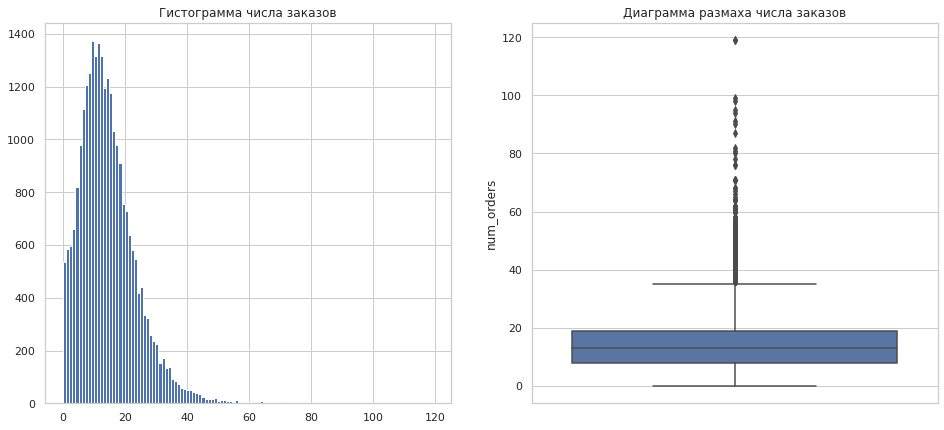

In [11]:
# посмотрю на диаграму размах и гистограму числа заказов
plt.figure(figsize=(16, 7))
sns.set(context = 'notebook', style = 'whitegrid', font_scale=1)

plt.subplot(1, 2, 1)
data['num_orders'].hist(bins=120)
plt.title('Гистограмма числа заказов')

plt.subplot(1, 2, 2)
sns.boxplot(y=data['num_orders'])
plt.title('Диаграмма размаха числа заказов')

<AxesSubplot:ylabel='num_orders'>

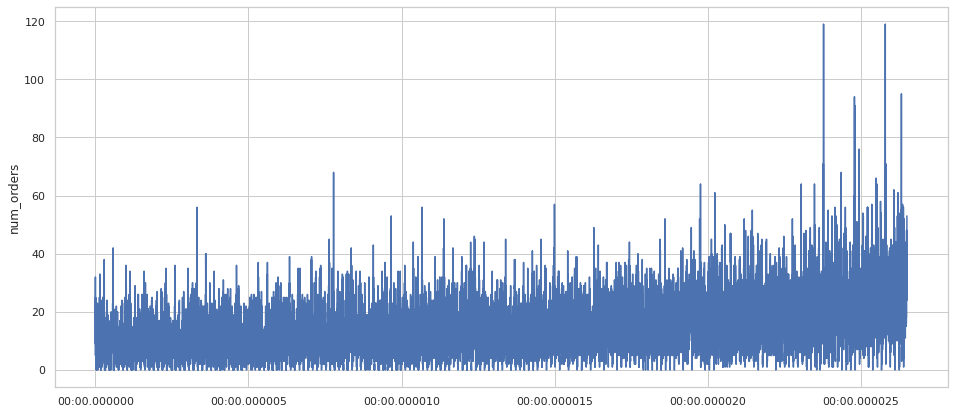

In [12]:
plt.figure(figsize=(16, 7))
sns.lineplot(data=data, x=data.index, y='num_orders')

Данные даны за 8 месяцев. думаю, что взгляд на данные закончен и можно действовать дальше - данные выглядят реалистично (некоторые выбросы в числе заказов - тоже не кажутся, чем-то нереальным - могут объяснятся неожиданными непериодическими факторами: дождь, сбой транспорта, футбол и пр.). распределение похоже на распределение Пуассона. 


Есть ощущение, что на протяжении 8 месяцев работы наблюдался рост (пото посмотрю более детально) - также кажется, что ряд является нестационнарным (растет сам и похоже, что растет амплитуда)

### Ресемплировние и подготовка признаков

В задании требуется произвести ресемплирование по часу. Т.к. интересует значение такси в час для агрегации использую сумму.

после того как datetime сделал индексом не сразу у меня (не понял почему) не получалось произвести ресемплинг, но все равно хочу оставить код выше (т.к. там смотрел на значения datetime), т.к. никаких изменений в датасет еще не вонсил то открою снова с параметром index_col

In [13]:
# открытие файла (на случай если буду открывать вне тренажера, прописал альтернативный путь)
try:
    data = pd.read_csv('/datasets/taxi.csv', parse_dates=[0], index_col=[0]) # такие parse_dates, т.к. все сначала
    # похоже на, то что было в тренажере + уже посмотрел на данные и понятно, что дата нужна в datetime
    # дату пока не делаю индексом, чтобы изучить столбец
    
except:
    data_path = 'C:/Users/v.kozlovskiy/Desktop/161092/'  
    data = pd.read_csv(data_path + 'taxi.csv')

In [14]:
data = data.resample('1H').sum()

In [15]:
data

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
...,...
2018-08-31 19:00:00,136
2018-08-31 20:00:00,154
2018-08-31 21:00:00,159


Подготовку признаков проведу опираясь на то что было в спринте (пока что плохо ориентируюсь и могу какие-то вещи совсем не так понять - буду подробно комментировать). Анализ сделаю уже после подготовки признаков - думаю так будет логичнее

Для выделения признаков подготовлю функцию - такой подход был в тренажере и его же видел в интернете (пока не очень подробно смотрел примеры).

Из календарных признаков думаю, что надо выделить:
- час (заказы явно меняются в течение суток), 
- день недели - тут явно выходные/будни должны варьировать,
- отдельно выделю признак с выходными,
- день месяца, скорее всего не так важен, но может какой-то смысл нести
- месяц явно будет иметь значение (т.к виден рост по месяцам)

Отстающие значения - будут показывать уменьшается или увеличивается число заказов. В спринте было задано 4 столбца с отастающими значениями - не знаю сходу сколько лучше задать отстающих значений - возможно тут надо будет производить подбор (аналогично подбору гиперпараметров), думаю что базово возьму 6 (четверть суток), но возможно придеться менять (или попоробую поменять).

Скользящее среднее - мне кажется, что лучше взять несколько скользящих средних - по суткам (24) и по неделе (24 * 7)  - тогда первую неделю придется удалить - думаю, что это можно сделать - если это некорректно - переделаю

In [16]:
# убрал - месяц, день месяца и скользящее среднее по неделе
def make_features(data, max_lag):
    data['hour'] = data.index.hour
    data['weekday'] = data.index.weekday
    data['is_weekend'] = data['weekday'].isin([5,6])*1
        
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean_day'] = data['num_orders'].shift().rolling(24).mean()


In [17]:
make_features(data, 2)

In [18]:
data.head(50)

,num_orders,hour,weekday,is_weekend,lag_1,lag_2,rolling_mean_day
datetime,,,,,,,
2018-03-01 00:00:00,124,0,3,0,NaN,NaN,NaN
2018-03-01 01:00:00,85,1,3,0,124.00,NaN,NaN
2018-03-01 02:00:00,71,2,3,0,85.00,124.00,NaN
2018-03-01 03:00:00,66,3,3,0,71.00,85.00,NaN
2018-03-01 04:00:00,43,4,3,0,66.00,71.00,NaN
2018-03-01 05:00:00,6,5,3,0,43.00,66.00,NaN
2018-03-01 06:00:00,12,6,3,0,6.00,43.00,NaN
2018-03-01 07:00:00,15,7,3,0,12.00,6.00,NaN
2018-03-01 08:00:00,34,8,3,0,15.00,12.00,NaN


In [19]:
# удалю пропуски
data_features = data.dropna()
data_features.shape

(4392, 7)

датасет стал меньше **на день** (после ресемплинга)  

In [20]:
# выделю выборки
train, test = train_test_split(data_features, shuffle=False, test_size=0.1)

features_train = train.drop(['num_orders'], axis=1)
target_train = train['num_orders']

features_test = test.drop(['num_orders'], axis=1)
target_test = test['num_orders']

<a id='step_2'></a>
## Анализ

Сначала посмотрю на данные методами указанными в спринте, потом может быть как-то еще

Text(0.5, 0, 'Дата')

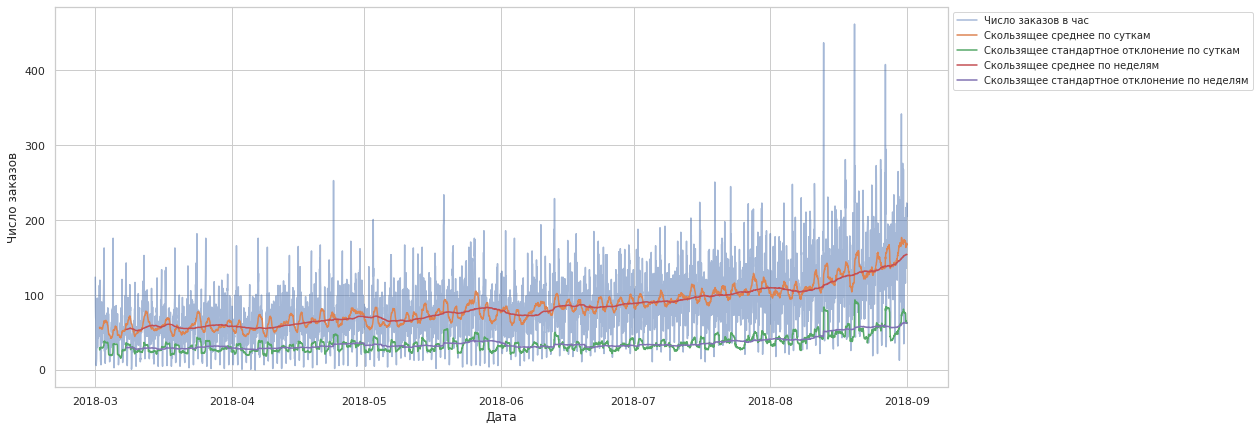

In [21]:
# выведу графики со скользящим средним и скользящим стандартным отклонением (по 24 суткам и по неделе)

plt.figure(figsize=(16, 7))
sns.lineplot(data=data, x=data.index, y=data['num_orders'], alpha=0.5, label='Число заказов в час')
sns.lineplot(data=data, x=data.index, y=data['num_orders'].rolling(24).mean(), label='Скользящее среднее по суткам')
sns.lineplot(data=data, x=data.index, y=data['num_orders'].rolling(24).std(), label='Скользящее стандартное отклонение по суткам')
sns.lineplot(data=data, x=data.index, y=data['num_orders'].rolling(24*7).mean(), label='Скользящее среднее по неделям')
sns.lineplot(data=data, x=data.index, y=data['num_orders'].rolling(24*7).std(), label='Скользящее стандартное отклонение по неделям')
plt.legend(bbox_to_anchor = (1,1), fontsize=10)
plt.ylabel('Число заказов', fontsize=12)
plt.xlabel('Дата', fontsize=12)

виден рост со временем: на основном графике, на графиках со скользящим средним по суткам и неделям, ближе к концу измерений начинает расти и стандартное отклонение (по суткам начинает сильнее варьировать)
ряд - нестационарный. Думаю, что значения в конце ряда (которые будут тестовой выборкой) будет сложнее прогнозировать (учитывая, то что там есть резкие изменения стандартного отклонения и значений)

В тренажере был показана функция seasonal_decompose() попробую посмотреть на тренд и шум (думаю, что сезонность не получиться увидеть) 

In [22]:
decomposed = seasonal_decompose(data['num_orders'])

<AxesSubplot:xlabel='datetime'>

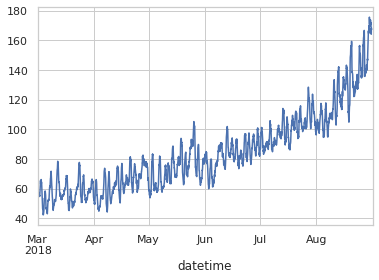

In [23]:
# тренд
decomposed.trend.plot()

<AxesSubplot:xlabel='datetime'>

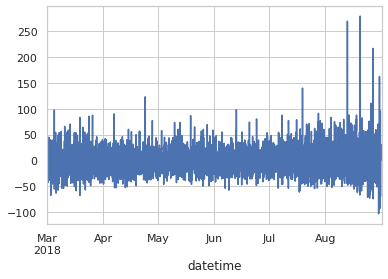

In [24]:
# шум
decomposed.resid.plot()

В тренажере также обсуждалась тема разностей временного ряда (возможно таким образом шел подход к тому чтобы рассматривать отстающие значения как признаки и видеть большую стационарность разностей). Решил посмотреть на графике как выглдят разности 

Text(0.5, 0, 'дата')

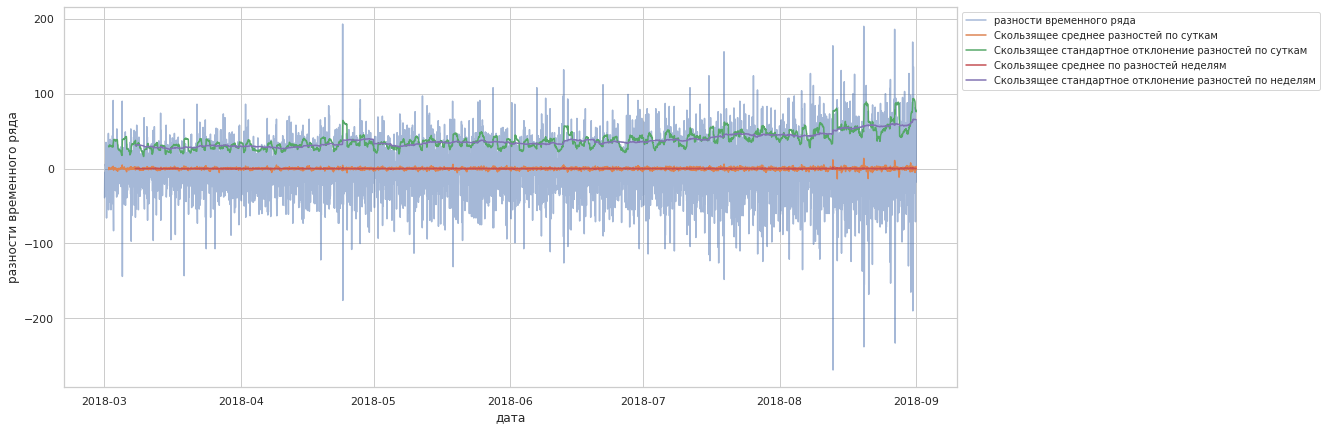

In [25]:
data['ts_difference'] = data['num_orders'] - data['lag_1']

plt.figure(figsize=(16, 7))
sns.lineplot(data=data, x=data.index, y=data['ts_difference'], alpha=0.5, label='разности временного ряда')
sns.lineplot(data=data, x=data.index, y=data['ts_difference'].rolling(24).mean(), label='Скользящее среднее разностей по суткам')
sns.lineplot(data=data, x=data.index, y=data['ts_difference'].rolling(24).std(), label='Скользящее стандартное отклонение разностей по суткам')
sns.lineplot(data=data, x=data.index, y=data['ts_difference'].rolling(24*7).mean(), label='Скользящее среднее по разностей неделям')
sns.lineplot(data=data, x=data.index, y=data['ts_difference'].rolling(24*7).std(), label='Скользящее стандартное отклонение разностей по неделям')
plt.legend(bbox_to_anchor = (1,1), fontsize=10)
plt.ylabel('разности временного ряда', fontsize=12)
plt.xlabel('дата', fontsize=12)

видно что разности более стационарны, чем число заказов. Скользящее среднее разностей по неделям и по суткам стремится к 0 (в конце ряда для данных по стукам сидны флуктуации). Скользящее стандартное отклонение разностей по неделям и по суткам меделенно растет (как и в случае данных по числу заказов).

Text(0.5, 0, 'дата')

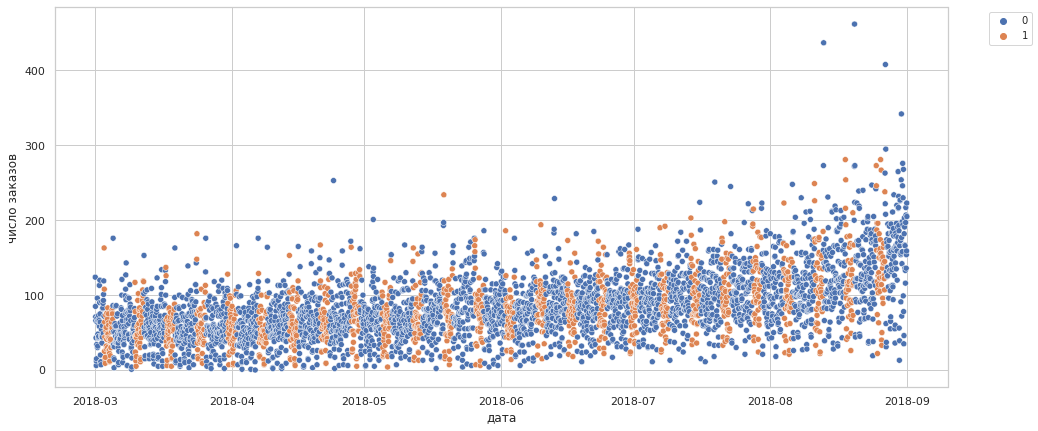

In [26]:
# хочу посмотреть число заказов на диаграмме рассеяния с учетом выходных
plt.figure(figsize=(16, 7))
sns.scatterplot(data=data, x=data.index, y=data['num_orders'], hue='is_weekend')
plt.legend(bbox_to_anchor = (1.1,1), fontsize=10)

plt.ylabel('число заказов', fontsize=12)
plt.xlabel('дата', fontsize=12)

In [27]:
# и посмотреть на среднее в будни и выходные
data.groupby('is_weekend')['num_orders'].agg('mean')

is_weekend
0   85.61
1   81.42
Name: num_orders, dtype: float64



Решил еще посмотреть на изменение среднего числа заказов в зависимости от времени суток, сделал функцию, но критерии отнесения к утру-ночи-дню конечно субъективные (но постарался сделать равные интервалы - 6 часов) - возможно существуют какие-то общепринятые критерии.
    
В то же время в признаки для модели время суток пока не буду вносить (там все таки есть более подробный признак - час дня)
    


In [28]:
# функия для категоризации времени суток
def time_of_day(time):
    if time > 23:
        return 'night'
    if time > 17:
        return 'evening'
    if time > 11:
        return 'day'
    if time > 5:
        return 'morning'
    else: 
        return 'night'

In [29]:
# применение функции
data['time_of_day'] = data['hour'].apply(time_of_day)

In [30]:
# смотрю на среднее число заказов по времени суток
data.groupby('time_of_day')['num_orders'].agg('mean')

time_of_day
day       84.80
evening   88.67
morning   65.32
night     98.90
Name: num_orders, dtype: float64

In [31]:
# посмотрю на то сколько значений относятся к какой категории
data.groupby('time_of_day')['num_orders'].agg('count')

time_of_day
day        1104
evening    1104
morning    1104
night      1104
Name: num_orders, dtype: int64

In [32]:
# и на то сколько суммарно заказов относятся к какой категории
data.groupby('time_of_day')['num_orders'].agg('sum')

time_of_day
day         93616
evening     97894
morning     72116
night      109185
Name: num_orders, dtype: int64

<AxesSubplot:xlabel='time_of_day', ylabel='num_orders'>

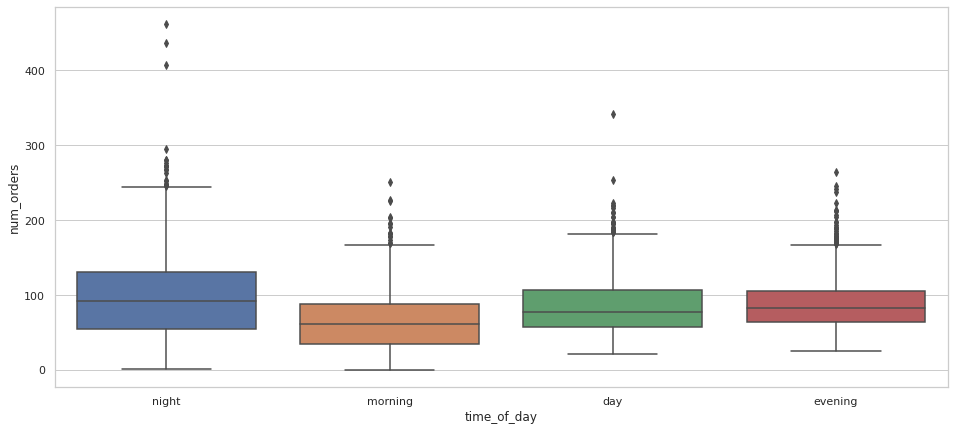

In [33]:
# и посмотрю на диаграммы размаха по времени суток
plt.figure(figsize=(16, 7))
sns.boxplot(data=data, x='time_of_day', y='num_orders')


Видно что утром заказов меньше, а больше всего ночью (что логично ночью не работают другие виды транспорта, утром работает транспорт + утром многие не рискуют ехать на такси в аэропорт из-за пробок)


In [34]:
data['num_orders'].describe()

count   4,416.00
mean       84.42
std        45.02
min         0.00
25%        54.00
50%        78.00
75%       107.00
max       462.00
Name: num_orders, dtype: float64

**Вывод по шагу**
Пока мне не кажется, что много чего могу сказать, основные мысли такие:
- можно предположить тренд роста заказов (**изменил после ревью**)
- временной ряд нестационарный 
- в выходные число заказов в среднем несколько меньше, чем в будни
- в конце ряда наблюдается не только рост но и больший разброс значений
- в конце ряда наблюдаются сильные выбросы - не думаю, что это что-то нереальное - но есть ощущение, что прогноз на конец ряда (часть августа) будет сильнее отличаться от реальности, чем в ситуации когда бы прогноз делался, например, на июнь
- видн, что заказов больше всего ночью, а меньше всего утром (**добавил после ревью**)

<a id='step_3'></a>
## Обучение

Думаю, что надо применить несколько моделей, подобрать для них (где надо оптимальные гиперпараметры) и провести кросс-валидацию - посмотрел в интеренете информацию на тему кросс-валидации временных рядов - в итоге сделал такую функцию (cross_val_TS) - надеюсь, что подход правильный.

Подобор гиперпараметров раньше вел через GridSearchCV или делал функцию с циклом - думаю, что сейчас попробую более прирмтивным способом (циклом) - т.к. информацию про применение GridSearchCV в интернете искал, ноплохо понял как это сделать

Планирую ипользовать следующие модели: DecisionTreeClassifier, RandomForestClassifier, KNeighborsClassifier, LogisticRegression - те которые использовал в предыдущих проектах


In [35]:
# функция для кросс-валидации по последовательным отрезкам, делящимся с помощью TimeSeriesSplit
def cross_val_TS(features, target, n_splits, model):
    tscv = TimeSeriesSplit(n_splits = n_splits)
    rmse_list = []
    for train_index, test_index in tscv.split(features):
        cv_train, cv_test = features.iloc[train_index], features.iloc[test_index]
        cv_target_train, cv_target_test = target.iloc[train_index], target.iloc[test_index]
        model = model
        model.fit(cv_train, cv_target_train)
        predictions = model.predict(cv_test)
        rmse_score = mean_squared_error(cv_target_test, predictions)**0.5
        rmse_list.append(rmse_score)
    return np.mean(rmse_list)
    print('Данные были поделены на', n_splits, 'отрезков. Значения RMSE:\n', rmse_list, f'Среднее значение RMSE:\n: {np.mean(rmse_list):.4f}')


In [36]:
%%time
# сразу посмотрю на результат для Логистической регресии
clf = LogisticRegression(random_state=12345)
cross_val_TS(features_train, target_train, 8, clf)

CPU times: user 42 s, sys: 1min, total: 1min 42s
Wall time: 1min 43s


42.22372738570918

вроде бы функция для кросс-валидации работает, немного изменю её - чтобы не выдавала текст о каждом шаге

In [37]:
# функция для кросс-валидации по последовательным отрезкам, делящимся с помощью TimeSeriesSplit
def cross_val_TS(features, target, n_splits, model):
    tscv = TimeSeriesSplit(n_splits = n_splits)
    rmse_list = []
    for train_index, test_index in tscv.split(features):
        cv_train, cv_test = features.iloc[train_index], features.iloc[test_index]
        cv_target_train, cv_target_test = target.iloc[train_index], target.iloc[test_index]
        model = model
        model.fit(cv_train, cv_target_train)
        predictions = model.predict(cv_test)
        rmse_score = mean_squared_error(cv_target_test, predictions)**0.5
        rmse_list.append(rmse_score)
    return np.mean(rmse_list)

In [38]:
# теперь сделаю функцю для подбора гиперпараметров для DecisionTreeClassifier, RandomForestClassifier и KNeighborsClassifier
# функция будет принимать тип модели, признаки и целевой признак, диапазон деревьев, диапазон оценщиков, число оценок в кросс-валидации
def model_best_params(model_type, features, target, range_depth_or_k, range_est, n_splits):

    best_rmse = 10000        # переменная для сохранения лучшего значения rmse т.к. чем меньше тем лучше задал 10000 как базовое
    best_depth_rmse = 0  # переменная для сохранения лучшей глубины дерева при этом

    depth_list = []    # список для записи глубины деревьев
    rmse_list = []       # список для записи rmse соответствующего глубине

    best_est_rmse = 10000    # переменная для сохранения лучшего числа деревьев при лучшем rmse
    est_list = []      # список для записи числа деревьев

    for est in range_est:
        
        for depth in range_depth_or_k:
        
            if model_type == 'k_nei':   
                clf = KNeighborsClassifier(n_neighbors=depth)                             # инициализация модели
                final_rmse_score = cross_val_TS(features_train, target_train, 3, clf)     # cредняя оценка качества модели
                
            if model_type == 'forest':
                clf = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
                final_rmse_score = cross_val_TS(features_train, target_train, 3, clf)     # cредняя оценка качества модели
            
            if model_type == 'tree':
                clf = DecisionTreeClassifier(random_state=12345, max_depth=depth)
                final_rmse_score = cross_val_TS(features_train, target_train, 3, clf)    # cредняя оценка качества модели
     
            depth_list.append(depth)            # добаление значения глубины дерева (k) в список для графика
            rmse_list.append(final_rmse_score)          # добаление значения rmse в список для графика
            est_list.append(est)                # добаление значения числа деревьев в список для графика
         
            if final_rmse_score < best_rmse:   # выцепление лучшего значения rmse и соответствующей глубины дерева и числа деревьев
                best_rmse = final_rmse_score
                best_depth_rmse = depth
              
                if model_type == 'forest': 
                    best_est_rmse = est
                  
                
    if model_type == 'forest':
        print('Для модели', model_type, f'лучшее значение rmse при кросс-валидации: {best_rmse:.4f}', 'при этом глубина дерева:', best_depth_rmse, 'число деревьев', best_est_rmse)    
    if model_type == 'tree':
        print('Для модели', model_type, f'лучшее значение rmse при кросс-валидации: {best_rmse:.4f}', 'при этом глубина дерева:', best_depth_rmse)
    if model_type == 'k_nei':
        print('Для модели', model_type, f'лучшее значение rmse при кросс-валидации: {best_rmse:.4f}', 'при этом число k:', best_depth_rmse,)
  
            
    plt.figure(figsize=(15, 6))
    sns.set(context = 'notebook', style = 'whitegrid', font_scale=1)
                        
    if model_type == 'tree':
        sns.scatterplot(x=depth_list, y=rmse_list)  # диаграмма рассеяния rmse в зависимости от глубины
        plt.xlabel('Число деревьев', fontsize=12)
        plt.ylabel('rmse score', fontsize=12)
        plt.title('rmse в зависимости от числа деревьев')
  
    if model_type == 'forest':
        sns.scatterplot(x=depth_list, y=rmse_list, hue=est_list)  # диаграмма рассеяния качетсва модели в зависимости от глубины деревьев
        plt.xlabel('Глубина дерева', fontsize=12)
        plt.ylabel('rmse score', fontsize=12)            
        plt.legend(title='число деревьев', bbox_to_anchor = (1,1)) # сдвиг легенды
        plt.title('rmse в зависимости от глубины дерева и числа деревьев', fontsize=12)
        
    if model_type == 'k_nei':
        sns.scatterplot(x=depth_list, y=rmse_list)  # диаграмма рассеяния rmse в зависимости от k
        plt.xlabel('Число k', fontsize=12)
        plt.ylabel('rmse score', fontsize=12)
        plt.title('rmse в зависимости от k')

Для модели k_nei лучшее значение rmse при кросс-валидации: 42.6172 при этом число k: 1
CPU times: user 940 ms, sys: 0 ns, total: 940 ms
Wall time: 929 ms


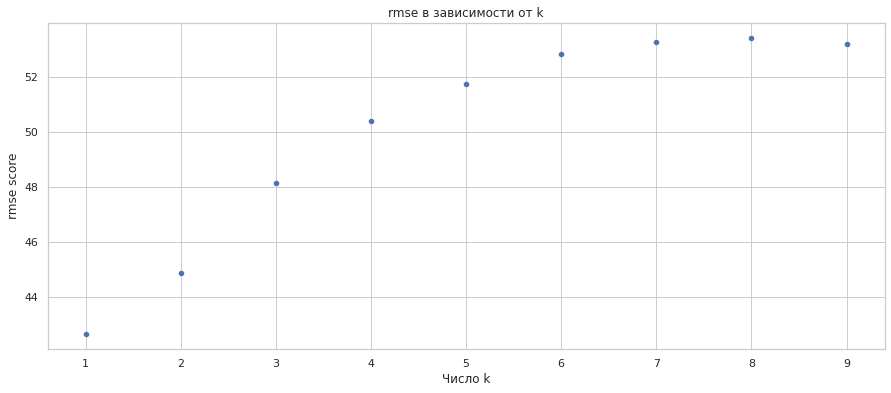

In [39]:
%%time
model_best_params('k_nei', features_train, target_train, range(1,10,1), range(1,2), 8)

Для модели tree лучшее значение rmse при кросс-валидации: 35.1171 при этом глубина дерева: 6
CPU times: user 1.31 s, sys: 0 ns, total: 1.31 s
Wall time: 1.32 s


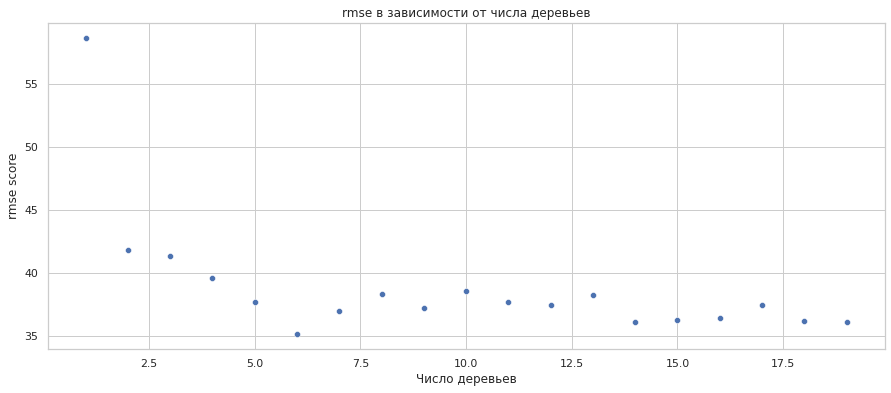

In [40]:
%%time
model_best_params('tree', features_train, target_train, range(1,20,1), range(1,2), 8)

Для модели forest лучшее значение rmse при кросс-валидации: 35.8010 при этом глубина дерева: 14 число деревьев 19
CPU times: user 41 s, sys: 147 ms, total: 41.2 s
Wall time: 41.2 s


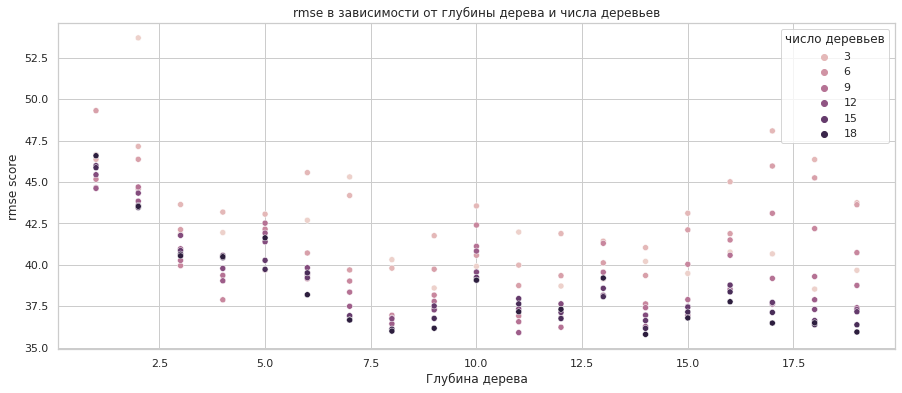

In [41]:
%%time
model_best_params('forest', features_train, target_train, range(1,20,1), range(1,20,2), 8)

In [42]:
# выведу лучшие значения rmse полученные для разных моделей
table = pd.DataFrame(data=[42.22, 42.62, 35.12, 35.8], columns=['best_rmse'])
table.index = ['LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier']
table.sort_values(by='best_rmse')

,best_rmse
DecisionTreeClassifier,35.12
RandomForestClassifier,35.80
LogisticRegression,42.22
KNeighborsClassifier,42.62


Лучший результат у RandomForest, у DecisionTreeClassifier быстро появляется переобучение, у KNeighborsClassifier лучший результат при k=1, самый худший результат у логистической регрессии - все результаты лучше чем требуемое значение (но при анализе было видно, что данные в августе отличаются от предыдущих - возможно результаты при тестировании ухудшаться)

<a id='step_4'></a>
## Тестирование

Планирую протестировать модели с оптимальными гиперпараметрами (там где они есть) и сравнить с DummyClassifier

In [43]:
%%time
logit = LogisticRegression()
logit.fit(features_train, target_train)
predictions_logit = logit.predict(features_test)
rmse_logit = mean_squared_error(target_test, predictions_logit)**0.5
print(f'rmse по LogisticRegression: {rmse_logit:.4f}')

rmse по LogisticRegression: 74.5155
CPU times: user 10.3 s, sys: 12.2 s, total: 22.5 s
Wall time: 22.5 s


In [44]:
%%time
neighboors = KNeighborsClassifier(n_neighbors=1)
neighboors.fit(features_train, target_train)
predictions_neighboors = neighboors.predict(features_test)
rmse_neighboors = mean_squared_error(target_test, predictions_neighboors)**0.5
print(rmse_neighboors)
print(f'rmse по KNeighborsClassifier: {rmse_neighboors:.4f}') 

65.83082657291132
rmse по KNeighborsClassifier: 65.8308
CPU times: user 42.1 ms, sys: 37.1 ms, total: 79.2 ms
Wall time: 42.7 ms


In [45]:
%%time
tree = DecisionTreeClassifier(random_state=12345, max_depth=6)
tree.fit(features_train, target_train)
predictions_tree = tree.predict(features_test)
rmse_tree = mean_squared_error(target_test, predictions_tree)**0.5
print(f'rmse по DecisionTreeClassifier: {rmse_tree:.4f}')

rmse по DecisionTreeClassifier: 66.4675
CPU times: user 22.4 ms, sys: 2.38 ms, total: 24.7 ms
Wall time: 67.8 ms


In [46]:
%%time
forest = RandomForestClassifier(random_state=12345, n_estimators=19, max_depth=14)
forest.fit(features_train, target_train)
predictions_forest = forest.predict(features_test)
rmse_forest = mean_squared_error(target_test, predictions_forest)**0.5
print(f'rmse по RandomForestClassifier: {rmse_forest:.4f}')

rmse по RandomForestClassifier: 58.3872
CPU times: user 343 ms, sys: 49.5 ms, total: 393 ms
Wall time: 402 ms


In [47]:
%%time
# смотрю результат с помощью DummyClassifier 
dummy_reg = DummyClassifier(strategy='most_frequent')   # strategy выбрал most_frequent
dummy_reg.fit(features_train, target_train)
predictions_dummy = dummy_reg.predict(features_test)
rmse_score_dummy = mean_squared_error(target_test, predictions_dummy)**0.5               # подсчет rmse
print(f'rmse по DummyClassifier: {rmse_score_dummy:.4f}')

rmse по DummyClassifier: 88.7017
CPU times: user 2.14 ms, sys: 1.49 ms, total: 3.63 ms
Wall time: 2.21 ms


ни одна из моделей не вышла на целевой уровень rmse - думаю что это объясняется тем, что было видно в ходе анализа данных - ряд нестационарный, тестовая выборка находится в конце, где наблюдаются изменения и сильнее выбросы
посмотрю на то как выглядят предсказания и целевой признак в тестовой выборке

Text(0.5, 0, 'дата')

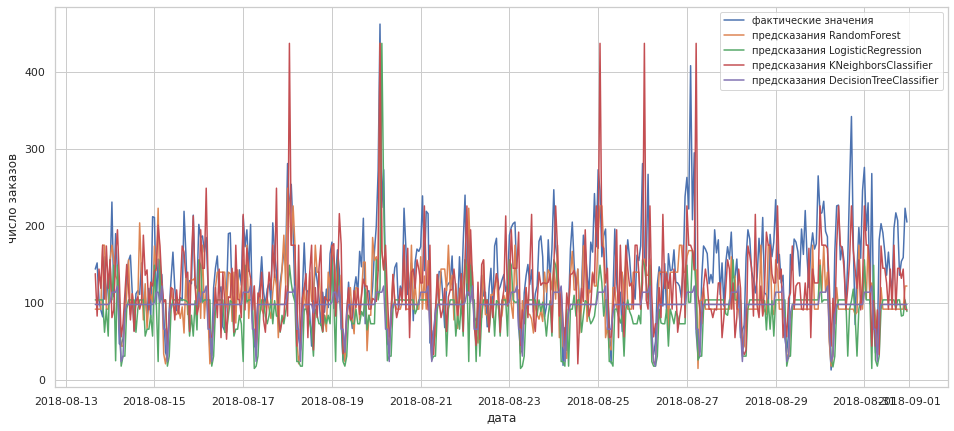

In [48]:
plt.figure(figsize=(16, 7))
sns.lineplot(data=target_test, x=target_test.index, y=target_test, label='фактические значения')
sns.lineplot(data=target_test, x=target_test.index, y=predictions_forest, label='предсказания RandomForest')
sns.lineplot(data=target_test, x=target_test.index, y=predictions_logit, label='предсказания LogisticRegression')
sns.lineplot(data=target_test, x=target_test.index, y=predictions_neighboors, label='предсказания KNeighborsClassifier')
sns.lineplot(data=target_test, x=target_test.index, y=predictions_tree, label='предсказания DecisionTreeClassifier')
plt.legend(bbox_to_anchor = (1,1), fontsize=10)
plt.ylabel('число заказов', fontsize=12)
plt.xlabel('дата', fontsize=12)

Мне кажется, что выбросы все таки стоит удалить, т.к. единичные **часы** (не дни) (даже реальные) мешают оценить работу, еще думаю, что столбец со скользящим средним тоже может быть лишним, далее планирую работать только с решающим деревом, случайным лесом и моделью KNeighborsClassifier - у Логистической регрессии результаты были хуже. Попробую поменять число отстающих значений.

## Дополнительная обработка

In [49]:
# открытие файла (на случай если буду открывать вне тренажера, прописал альтернативный путь)
try:
    data2 = pd.read_csv('/datasets/taxi.csv', parse_dates=[0], index_col=[0]) # такие parse_dates, т.к. все сначала
    # похоже на, то что было в тренажере + уже посмотрел на данные и понятно, что дата нужна в datetime
    # дату пока не делаю индексом, чтобы изучить столбец
    
except:
    data_path = 'C:/Users/v.kozlovskiy/Desktop/161092/'  
    data2 = pd.read_csv(data_path + 'taxi.csv')

In [50]:
data2 = data2.resample('1H').sum()

In [51]:
data2.describe()

,num_orders
count,"4,416.00"
mean,84.42
std,45.02
min,0.00
25%,54.00
50%,78.00
75%,107.00
max,462.00


In [52]:
#подберу границы, за которыми данные будут считаться выбросами
upper = 107 + 1.5*(107-54)
lower = 54 - 1.5*(107-54)
print(upper)
print(lower)

186.5
-25.5


верхнюю границу выберу как 200 заказов, нижнюю делать не буду

In [53]:
data2=data2.query('num_orders < 200')


Попробую оставить один лаг


In [54]:
make_features(data2, 1)

In [55]:
data2 = data2.dropna()
data2

,num_orders,hour,weekday,is_weekend,lag_1,rolling_mean_day
datetime,,,,,,
2018-03-02 00:00:00,90,0,4,0,58.00,56.83
2018-03-02 01:00:00,120,1,4,0,90.00,55.42
2018-03-02 02:00:00,75,2,4,0,120.00,56.88
2018-03-02 03:00:00,64,3,4,0,75.00,57.04
2018-03-02 04:00:00,20,4,4,0,64.00,56.96
...,...,...,...,...,...,...
2018-08-31 15:00:00,116,15,4,0,133.00,130.08
2018-08-31 16:00:00,197,16,4,0,116.00,134.38
2018-08-31 19:00:00,136,19,4,0,197.00,140.96


In [56]:
# выделю выборки
train, test = train_test_split(data2, shuffle=False, test_size=0.1)

features_train = train.drop(['num_orders'], axis=1)
target_train = train['num_orders']

features_test = test.drop(['num_orders'], axis=1)
target_test = test['num_orders']



Для Решающего дерева и Случайного леса еще раз подберу гипрепараметры
    


Для модели tree лучшее значение rmse при кросс-валидации: 33.0498 при этом глубина дерева: 8
CPU times: user 1.03 s, sys: 0 ns, total: 1.03 s
Wall time: 1.03 s


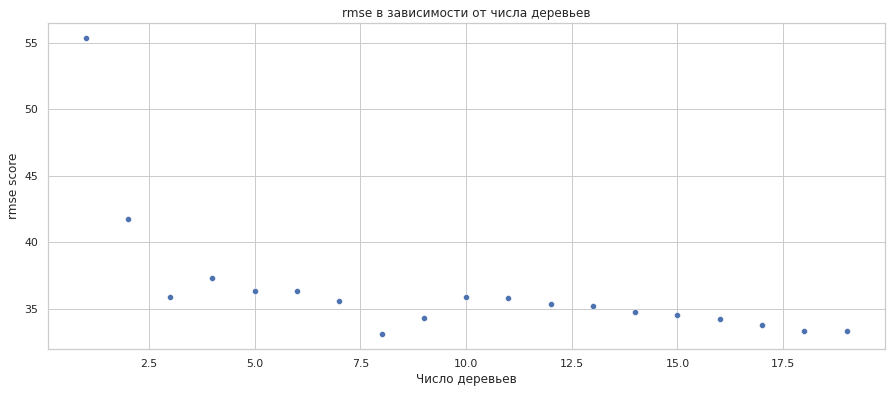

In [57]:
%%time
model_best_params('tree', features_train, target_train, range(1,20,1), range(1,2), 8)

Для модели forest лучшее значение rmse при кросс-валидации: 31.6511 при этом глубина дерева: 12 число деревьев 17
CPU times: user 40.5 s, sys: 806 ms, total: 41.3 s
Wall time: 42 s


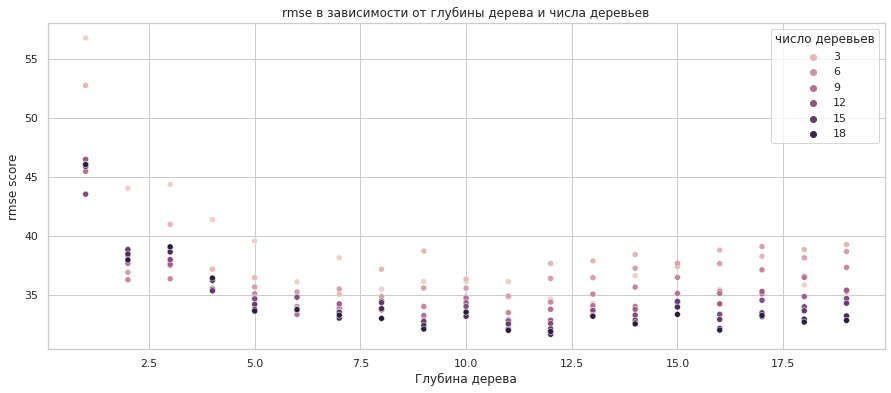

In [58]:
%%time
model_best_params('forest', features_train, target_train, range(1,20,1), range(1,20,2), 8)

## Дополнительное тестирование

In [59]:
%%time
tree = DecisionTreeClassifier(random_state=12345, max_depth=8)
tree.fit(features_train, target_train)
predictions_tree = tree.predict(features_test)
rmse_tree = mean_squared_error(target_test, predictions_tree)**0.5
print(f'rmse по DecisionTree: {rmse_tree:.4f}')

rmse по DecisionTree: 52.4643
CPU times: user 30.4 ms, sys: 88 µs, total: 30.5 ms
Wall time: 29.3 ms


In [60]:
%%time
neighboors = KNeighborsClassifier(n_neighbors=1)
neighboors.fit(features_train, target_train)
predictions_neighboors = neighboors.predict(features_test)
rmse_neighboors = mean_squared_error(target_test, predictions_neighboors)**0.5
print(rmse_neighboors)
print(f'rmse по KNeighborsClassifier: {rmse_neighboors:.4f}') 

50.098765562685
rmse по KNeighborsClassifier: 50.0988
CPU times: user 29.9 ms, sys: 8.46 ms, total: 38.4 ms
Wall time: 30.6 ms


In [61]:
%%time
forest = RandomForestClassifier(random_state=12345, n_estimators=12, max_depth=17)
forest.fit(features_train, target_train)
predictions_forest = forest.predict(features_test)
rmse_forest = mean_squared_error(target_test, predictions_forest)**0.5
print(f'rmse по RandomForestClassifier: {rmse_forest:.4f}')

rmse по RandomForestClassifier: 47.4837
CPU times: user 223 ms, sys: 35.4 ms, total: 259 ms
Wall time: 263 ms


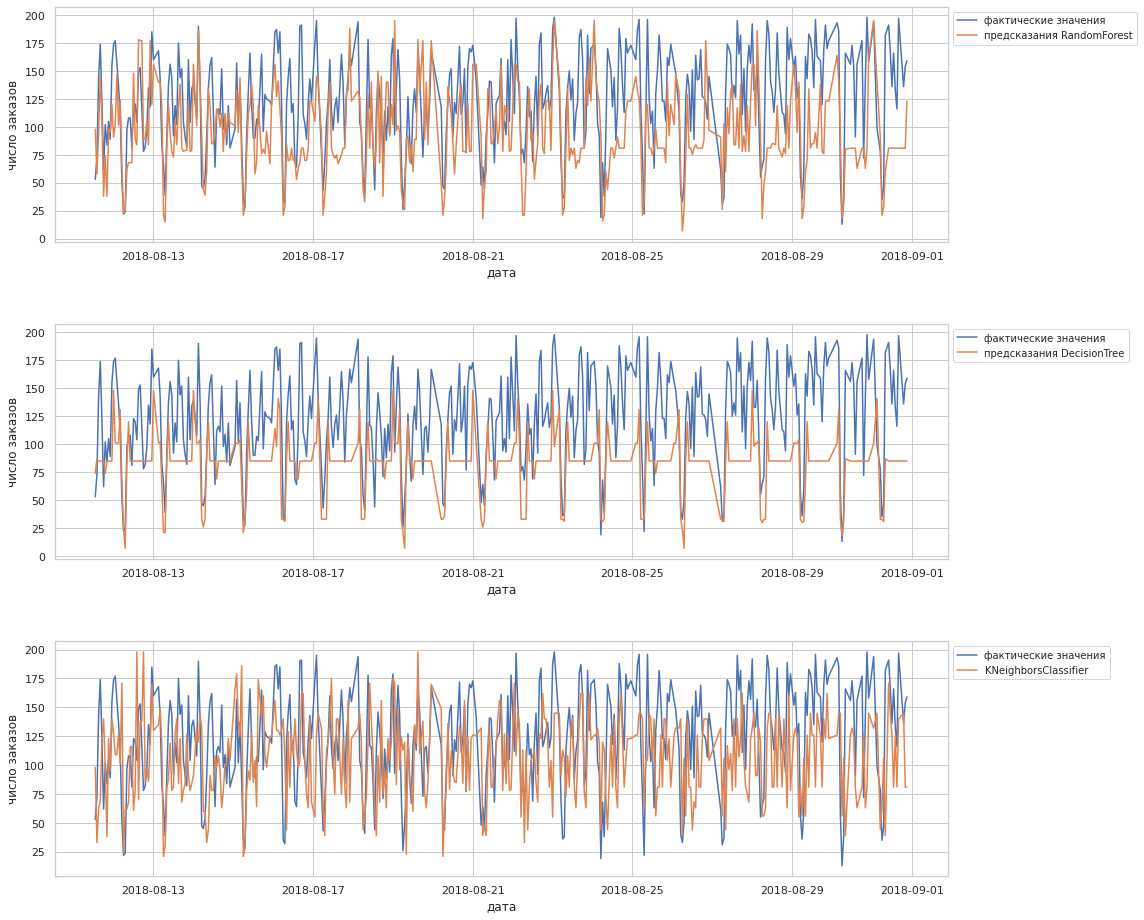

In [62]:
# посмотрю на соотношения фактических значений и предсказаний
plt.figure(figsize=(16, 16))

plt.subplot(3, 1, 1) 
sns.lineplot(data=target_test, x=target_test.index, y=target_test, label='фактические значения')
sns.lineplot(data=target_test, x=target_test.index, y=predictions_forest, label='предсказания RandomForest')
plt.legend(bbox_to_anchor = (1,1), fontsize=10)
plt.ylabel('число заказов', fontsize=12)
plt.xlabel('дата', fontsize=12)

plt.subplot(3, 1, 2) 
sns.lineplot(data=target_test, x=target_test.index, y=target_test, label='фактические значения')
sns.lineplot(data=target_test, x=target_test.index, y=predictions_tree, label='предсказания DecisionTree')
plt.legend(bbox_to_anchor = (1,1), fontsize=10)
plt.ylabel('число заказов', fontsize=12)
plt.xlabel('дата', fontsize=12)

plt.subplot(3, 1, 3) 
sns.lineplot(data=target_test, x=target_test.index, y=target_test, label='фактические значения')
sns.lineplot(data=target_test, x=target_test.index, y=predictions_neighboors, label='KNeighborsClassifier')
plt.legend(bbox_to_anchor = (1,1), fontsize=10)
plt.ylabel('число заказов', fontsize=12)
plt.xlabel('дата', fontsize=12)

plt.subplots_adjust(hspace=0.35)

### Вывод
- в одной из моделей - RandomForestClassifier удалось достичь требуемого rmse - 47.48 (меньше 48),
- в других этого не получилось сделать - думаю, что трудность предсказания связана с нестационарностью ряда
- на графике видно, что модели DecisionTree достаточно неплохо предсказывают низкое число заказов, но с высокими предсказание не справляется. Кажется, что с высоким числом лучше справлется KNeighborsClassifier и логистическая регрессия, но в его случае rmse выше целевого значения
- **в этой версии лучший результат у RandomForestClassifier (и по графику есть ощущение, что предсказываются и высокие значения) и удалось достичь нужной точности предсказания, но она совсем не границе обговоренной в задании (48)**